In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.4/447.4 kB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 102.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/

PHARMACEUTICAL SCM MANANGEMENT

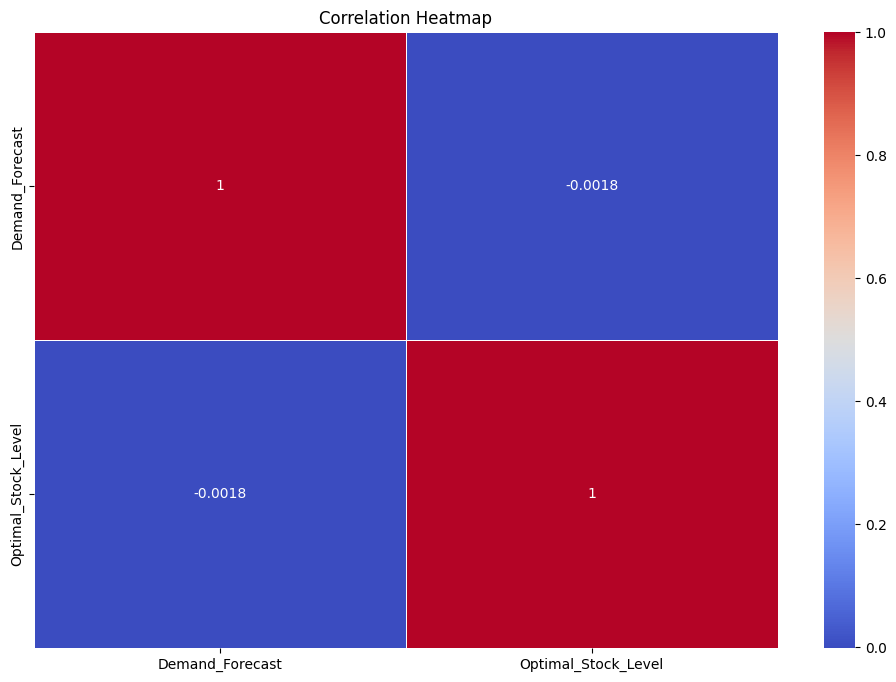

Model Performance:
                                 MAE           MSE         RMSE        R2
Linear Regression       2251.575375  6.753771e+06  2598.801808 -0.000005
Decision Tree           2902.207600  1.259080e+07  3548.351760 -0.864271
Random Forest           2508.207240  9.025404e+06  3004.231046 -0.336357
Support Vector Machine  2251.584527  6.754238e+06  2598.891712 -0.000074
K-Nearest Neighbors     2400.086660  8.125488e+06  2850.524240 -0.203110
Gradient Boosting       2252.571935  6.762592e+06  2600.498369 -0.001311
XGBoost                 2264.985381  6.863116e+06  2619.755043 -0.016195


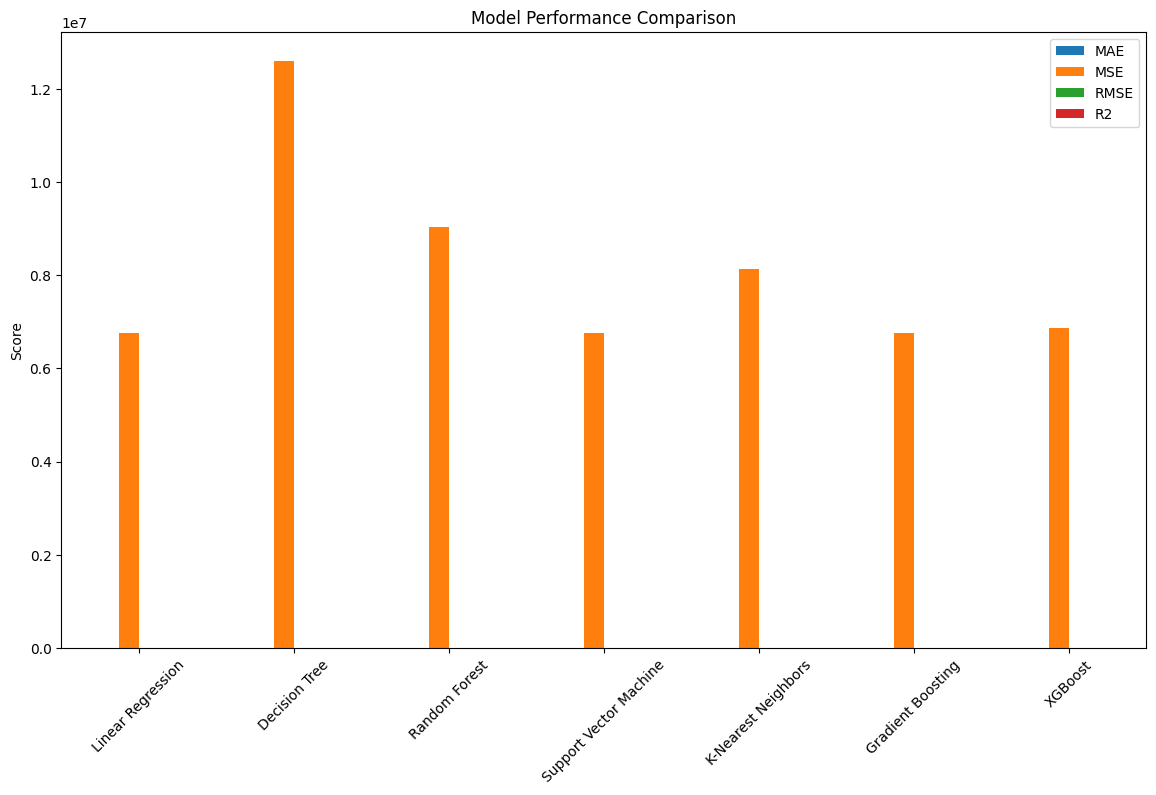

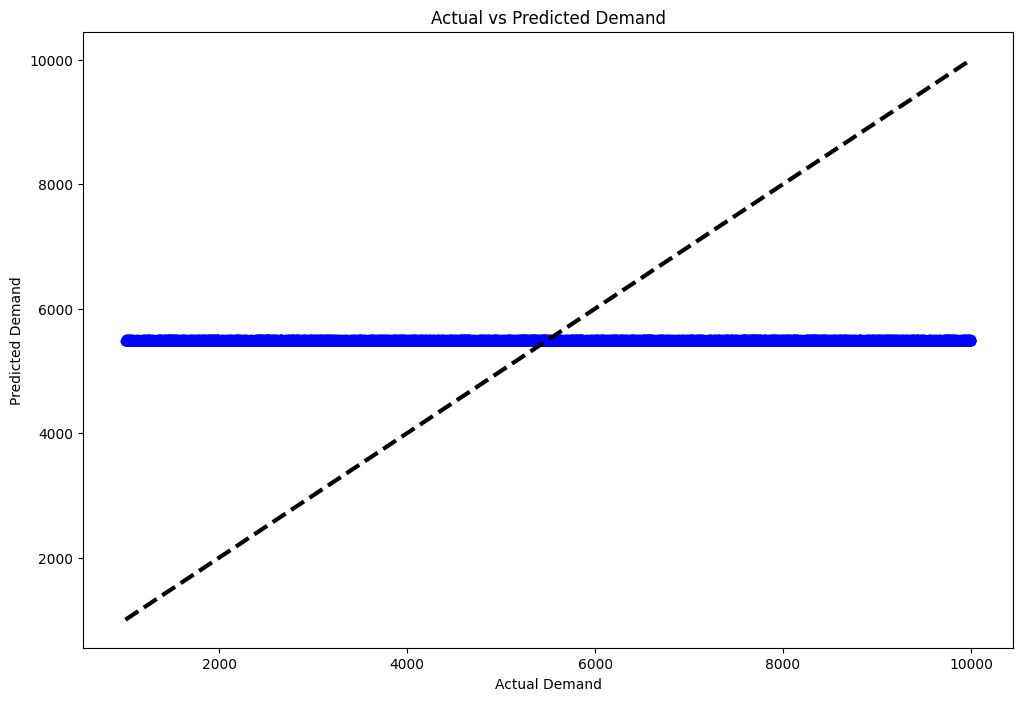

y contains previously unseen labels: 'Aspirin'


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Function to preprocess the data for training
def preprocess_data(file_path):
    # Load dataset
    df = pd.read_excel(file_path, sheet_name='Sheet1')

    # Plot heatmap of the correlation matrix
    numerical_df = df.select_dtypes(include=np.number)
    plt.figure(figsize=(12, 8))
    sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.show()

    # Encode categorical features
    label_encoder_drug = LabelEncoder()
    label_encoder_restock = LabelEncoder()
    df['Drug_encoded'] = label_encoder_drug.fit_transform(df['Drug'])
    df['Restocking_Strategy_encoded'] = label_encoder_restock.fit_transform(df['Restocking_Strategy'])

    # Drop original categorical columns
    df_processed = df.drop(['Drug', 'Restocking_Strategy'], axis=1)

    # Apply K-Means clustering and add the cluster as a feature
    kmeans = KMeans(n_clusters=5, random_state=42)
    df_processed['Cluster'] = kmeans.fit_predict(df_processed.drop('Demand_Forecast', axis=1))

    # Define features and target variable
    X = df_processed.drop('Demand_Forecast', axis=1)
    y = df_processed['Demand_Forecast']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Save label encoders and scaler for future use
    joblib.dump(label_encoder_drug, '/content/label_encoder_drug.pkl')
    joblib.dump(label_encoder_restock, '/content/label_encoder_restock.pkl')
    joblib.dump(scaler, '/content/scaler.pkl')
    joblib.dump(kmeans, '/content/kmeans.pkl')

    return X_train, X_test, y_train, y_test, df_processed

# Function to train models and evaluate performance
def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        'Linear Regression': LinearRegression(),
        'Decision Tree': DecisionTreeRegressor(random_state=42),
        'Random Forest': RandomForestRegressor(n_jobs=-1, random_state=42),
        'Support Vector Machine': SVR(),
        'K-Nearest Neighbors': KNeighborsRegressor(),
        'Gradient Boosting': GradientBoostingRegressor(random_state=42),
        'XGBoost': xgb.XGBRegressor(n_jobs=-1, random_state=42)
    }

    results = {}
    best_model_name = None
    best_r2_score = -np.inf

    # Train each model and evaluate
    for name, model in models.items():
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        r2 = r2_score(y_test, predictions)
        mae = mean_absolute_error(y_test, predictions)
        mse = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(mse)
        results[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

        # Keep track of the best model based on R-squared
        if r2 > best_r2_score:
            best_r2_score = r2
            best_model_name = name
            best_model = model

    # Save the best model
    joblib.dump(best_model, 'best_model.pkl')

    return results, best_model_name, best_model

# Function for making predictions with the trained model
def predict_demand(input_data):
    # Load the trained model, scaler, encoders, and kmeans
    model = joblib.load('best_model.pkl')
    scaler = joblib.load('/content/scaler.pkl')
    label_encoder_drug = joblib.load('/content/label_encoder_drug.pkl')
    label_encoder_restock = joblib.load('/content/label_encoder_restock.pkl')
    kmeans = joblib.load('/content/kmeans.pkl')

    # Encode the input data
    input_data['Drug_encoded'] = label_encoder_drug.transform([input_data['Drug']])[0]
    input_data['Restocking_Strategy_encoded'] = label_encoder_restock.transform([input_data['Restocking_Strategy']])[0]

    # Drop original categorical columns
    input_data = input_data.drop(['Drug', 'Restocking_Strategy'], axis=1)

    # Predict cluster
    input_data['Cluster'] = kmeans.predict(input_data.values.reshape(1, -1))

    # Standardize features
    input_data_scaled = scaler.transform(input_data)

    # Make prediction
    predicted_demand = model.predict(input_data_scaled)

    return predicted_demand[0]

# Plotting function for model performance
def plot_model_performance(results):
    results_df = pd.DataFrame(results).T
    results_df.plot(kind='bar', figsize=(14, 8))
    plt.title('Model Performance Comparison')
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    plt.legend(loc='upper right')
    plt.show()

# Function to plot actual vs predicted demand for the best model
def plot_actual_vs_predicted(model, X_test, y_test):
    predictions = model.predict(X_test)
    plt.figure(figsize=(12, 8))
    plt.scatter(y_test, predictions, alpha=0.6, color='b')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
    plt.xlabel('Actual Demand')
    plt.ylabel('Predicted Demand')
    plt.title('Actual vs Predicted Demand')
    plt.show()

# Main execution function
def main(file_path):
    X_train, X_test, y_train, y_test, df_processed = preprocess_data(file_path)
    results, best_model_name, best_model = train_and_evaluate_models(X_train, X_test, y_train, y_test)
    print("Model Performance:\n", pd.DataFrame(results).T)
    plot_model_performance(results)
    plot_actual_vs_predicted(best_model, X_test, y_test)
    return best_model

# Example usage
if __name__ == '__main__':
    file_path = '/content/Pharmaceutical Supply Chain Optimization.xlsx'
    best_model = main(file_path)

    # Example prediction
    input_data = pd.DataFrame([{
        'Drug': 'Aspirin',
        'Restocking_Strategy': 'Strategy_A',
        'Other_Feature_1': 10,
        'Other_Feature_2': 5,
        'Other_Feature_3': 20
    }])

    try:
        predicted_demand = predict_demand(input_data)
        print(f"Predicted Demand: {predicted_demand}")
    except ValueError as e:
        print(e)


Frontend

In [ ]:
!pip install pandas scikit-learn joblib Flask ngrok openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 24.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import os

# Function to preprocess the data
def preprocess_data(file_path):
    # Load dataset
    df = pd.read_excel(file_path, sheet_name='Sheet1')

    # Encode categorical features
    label_encoder_drug = LabelEncoder()
    label_encoder_restock = LabelEncoder()
    df['Drug_encoded'] = label_encoder_drug.fit_transform(df['Drug'])
    df['Restocking_Strategy_encoded'] = label_encoder_restock.fit_transform(df['Restocking_Strategy'])

    # Drop original categorical columns
    df_processed = df.drop(['Drug', 'Restocking_Strategy'], axis=1)

    # Apply K-Means clustering and add the cluster as a feature
    kmeans = KMeans(n_clusters=5, random_state=42)
    df_processed['Cluster'] = kmeans.fit_predict(df_processed.drop('Demand_Forecast', axis=1))

    # Define features and target variable
    X = df_processed.drop('Demand_Forecast', axis=1)
    y = df_processed['Demand_Forecast']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test, scaler, label_encoder_drug, label_encoder_restock, kmeans

# Function to train the model
def train_model(X_train, y_train):
    model = RandomForestRegressor(n_jobs=-1, random_state=42)
    model.fit(X_train, y_train)
    return model

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    return r2, mae, mse, predictions

# Main execution function
def main(file_path):
    X_train, X_test, y_train, y_test, scaler, label_encoder_drug, label_encoder_restock, kmeans = preprocess_data(file_path)
    model = train_model(X_train, y_train)
    r2, mae, mse, predictions = evaluate_model(model, X_test, y_test)

    # Save model and scalers
    joblib.dump(model, 'best_model.pkl')
    joblib.dump(scaler, 'scaler.pkl')
    joblib.dump(label_encoder_drug, 'label_encoder_drug.pkl')
    joblib.dump(label_encoder_restock, 'label_encoder_restock.pkl')
    joblib.dump(kmeans, 'kmeans.pkl')

    print(f"Model trained and saved. R²: {r2:.2f}, MAE: {mae:.2f}, MSE: {mse:.2f}")

# Example usage
file_path = '/content/Pharmaceutical Supply Chain Optimization.xlsx'  # Update the file path as needed
main(file_path)


Model trained and saved. R²: -0.34, MAE: 2508.21, MSE: 9025404.18


In [ ]:
def main():
    print("Welcome to the Demand Prediction Model!")
    drug_choices =['Metformin', 'Lisinopril', 'Insulin', 'Atorvastatin']
    strategy_choices = ['Monthly','Quarterly']

    while True:
        drug = input(f"Enter the Drug ({', '.join(drug_choices)}): ")
        restocking_strategy = input(f"Enter the Restocking Strategy ({', '.join(strategy_choices)}): ")
        feature1 = input("Enter Feature 1: ")
        #feature2 = input("Enter Feature 2: ")
        #feature3 = input("Enter Feature 3: ")

        result = predict_demand(drug, restocking_strategy, feature1)

        # Print the result
        print(result)

        # Ask if the user wants to predict again
        again = input("Do you want to predict again? (yes/no): ").strip().lower()
        if again != 'yes':
            break

if __name__ == "__main__":
    main()


Welcome to the Demand Prediction Model!
Enter the Drug (Metformin, Lisinopril, Insulin, Atorvastatin): Insulin
Enter the Restocking Strategy (Monthly, Quarterly): Monthly
Enter Feature 1: 120


TypeError: predict_demand() takes 1 positional argument but 3 were given

In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.4/447.4 kB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 76.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/1

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
import gradio as gr

# Load and preprocess the data
def load_and_preprocess_data(file_path):
    df = pd.read_excel(file_path, sheet_name='Sheet1')

    # Encode categorical features
    label_encoder_drug = LabelEncoder()
    label_encoder_restock = LabelEncoder()
    df['Drug_encoded'] = label_encoder_drug.fit_transform(df['Drug'])
    df['Restocking_Strategy_encoded'] = label_encoder_restock.fit_transform(df['Restocking_Strategy'])

    # Define features and target variable
    X = df[['Drug_encoded', 'Restocking_Strategy_encoded', 'Optimal_Stock_Level']]
    y = df['Demand_Forecast']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize features
    scaler = StandardScaler()
    X_train[['Optimal_Stock_Level']] = scaler.fit_transform(X_train[['Optimal_Stock_Level']])
    X_test[['Optimal_Stock_Level']] = scaler.transform(X_test[['Optimal_Stock_Level']])

    return X_train, y_train, label_encoder_drug, label_encoder_restock, scaler

# Function to train the model
def train_model(X_train, y_train):
    model = RandomForestRegressor(n_jobs=-1, random_state=42)
    model.fit(X_train, y_train)
    return model

# Prediction function
def predict_demand(drug, restocking_strategy, optimal_stock_level):
    try:
        # Encode the inputs
        drug_encoded = label_encoder_drug.transform([drug])[0]
        restocking_strategy_encoded = label_encoder_restock.transform([restocking_strategy])[0]

        # Prepare input data for prediction
        input_data = np.array([[drug_encoded, restocking_strategy_encoded, optimal_stock_level]])

        # Standardize the input data (only scale the 'Optimal_Stock_Level')
        input_data[:, 2] = scaler.transform(input_data[:, 2].reshape(-1, 1)).flatten()

        # Make the prediction
        prediction = model.predict(input_data)

        # Prepare output
        return {
            "Predicted Demand": round(prediction[0], 2),
            "Inputs": {
                "Drug": drug,
                "Restocking Strategy": restocking_strategy,
                "Optimal Stock Level": optimal_stock_level
            }
        }
    except Exception as e:
        return f"An unexpected error occurred: {str(e)}"

# Gradio interface function
def gradio_interface(drug, restocking_strategy, optimal_stock_level):
    # Call the predict_demand function with inputs from Gradio components
    result = predict_demand(drug, restocking_strategy, optimal_stock_level)
    # Return the prediction result for display in the Gradio output
    return str(result)

# Main function to run the code
def main(file_path):
    global label_encoder_drug, label_encoder_restock, scaler, model

    # Load and preprocess data
    X_train, y_train, label_encoder_drug, label_encoder_restock, scaler = load_and_preprocess_data(file_path)

    # Train the model
    model = train_model(X_train, y_train)

    return "Model is ready for predictions!"

# File path to your Excel file
file_path = '/content/Pharmaceutical Supply Chain Optimization.xlsx'  # Update this path as necessary
main(file_path)

# Create Gradio Blocks
with gr.Blocks() as demo:
    gr.Markdown("## Demand Prediction Model")
    drug_input = gr.Dropdown(choices=['Metformin', 'Lisinopril', 'Insulin', 'Atorvastatin'], label="Drug")
    restocking_strategy_input = gr.Dropdown(choices=['Monthly', 'Quarterly'], label="Restocking Strategy")
    optimal_stock_level_input = gr.Number(label="Optimal Stock Level")
    submit_btn = gr.Button("Predict Demand")
    output = gr.Textbox(label="Prediction Result", interactive=False)

    submit_btn.click(gradio_interface, inputs=[drug_input, restocking_strategy_input, optimal_stock_level_input], outputs=output)

# Launch the Gradio app
demo.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://fd72d1f7258cc5546d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
